<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.640190,55.851595,39.359059,-4509.154456,-4365.303612,337.576143,-4702.879755
1,0.0,1.0,35.326718,49.058444,83.400377,4149.024778,4326.810317,-273.334872,4600.145189
2,0.0,2.0,76.247866,79.150589,87.119897,-7635.166634,-7382.648283,205.802469,-7588.450752
3,0.0,3.0,38.969375,28.139892,97.244312,271.418634,445.772213,-614.983900,1060.756114
4,0.0,4.0,59.005679,34.712285,46.023475,444.941955,594.683394,177.896107,416.787287
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.195794,90.266436,76.776721,-11801.519039,-11580.280088,-708.484227,-10871.795861
249996,999.0,246.0,39.269443,37.875803,65.359738,260.655098,413.160081,15.636650,397.523431
249997,999.0,247.0,82.556864,85.521081,93.498042,-6294.854881,-6023.278894,-1074.586373,-4948.692521
249998,999.0,248.0,41.613421,87.057451,92.164447,-11079.687509,-10848.852191,-995.331457,-9853.520734


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.640190,55.851595,39.359059,-4509.154456,-4365.303612,337.576143,-4702.879755
1,0.0,1.0,35.326718,49.058444,83.400377,4149.024778,4326.810317,-273.334872,4600.145189
2,0.0,2.0,76.247866,79.150589,87.119897,-7635.166634,-7382.648283,205.802469,-7588.450752
3,0.0,3.0,38.969375,28.139892,97.244312,271.418634,445.772213,-614.983900,1060.756114
4,0.0,4.0,59.005679,34.712285,46.023475,444.941955,594.683394,177.896107,416.787287
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.195794,90.266436,76.776721,-11801.519039,-11580.280088,-708.484227,-10871.795861
249996,999.0,246.0,39.269443,37.875803,65.359738,260.655098,413.160081,15.636650,397.523431
249997,999.0,247.0,82.556864,85.521081,93.498042,-6294.854881,-6023.278894,-1074.586373,-4948.692521
249998,999.0,248.0,41.613421,87.057451,92.164447,-11079.687509,-10848.852191,-995.331457,-9853.520734


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    38.640190  55.851595  ...   337.576143  -4702.879755
      1.0    35.326718  49.058444  ...  -273.334872   4600.145189
      2.0    76.247866  79.150589  ...   205.802469  -7588.450752
      3.0    38.969375  28.139892  ...  -614.983900   1060.756114
      4.0    59.005679  34.712285  ...   177.896107    416.787287
...                ...        ...  ...          ...           ...
999.0 245.0  44.195794  90.266436  ...  -708.484227 -10871.795861
      246.0  39.269443  37.875803  ...    15.636650    397.523431
      247.0  82.556864  85.521081  ... -1074.586373  -4948.692521
      248.0  41.613421  87.057451  ...  -995.331457  -9853.520734
      249.0  37.765406  45.675924  ...   -58.229797  -2007.839430

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    38.640190  55.851595  ...   337.576143  -4702.879755
      1.0    35.326718  49.058444  ...  -273.334872   4600.145189
      2.0    76.247866  79.150589  ...   205.802469  -7588.450752
      3.0    38.969375  28.139892  ...  -614.983900   1060.756114
      4.0    59.005679  34.712285  ...   177.896107    416.787287
...                ...        ...  ...          ...           ...
999.0 245.0  44.195794  90.266436  ...  -708.484227 -10871.795861
      246.0  39.269443  37.875803  ...    15.636650    397.523431
      247.0  82.556864  85.521081  ... -1074.586373  -4948.692521
      248.0  41.613421  87.057451  ...  -995.331457  -9853.520734
      249.0  37.765406  45.675924  ...   -58.229797  -2007.839430

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.640190,55.851595,39.359059,-4509.154456,-4365.303612,337.576143,-4702.879755
1,0.0,1.0,35.326718,49.058444,83.400377,4149.024778,4326.810317,-273.334872,4600.145189
2,0.0,2.0,76.247866,79.150589,87.119897,-7635.166634,-7382.648283,205.802469,-7588.450752
3,0.0,3.0,38.969375,28.139892,97.244312,271.418634,445.772213,-614.983900,1060.756114
4,0.0,4.0,59.005679,34.712285,46.023475,444.941955,594.683394,177.896107,416.787287
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.195794,90.266436,76.776721,-11801.519039,-11580.280088,-708.484227,-10871.795861
249996,999.0,246.0,39.269443,37.875803,65.359738,260.655098,413.160081,15.636650,397.523431
249997,999.0,247.0,82.556864,85.521081,93.498042,-6294.854881,-6023.278894,-1074.586373,-4948.692521
249998,999.0,248.0,41.613421,87.057451,92.164447,-11079.687509,-10848.852191,-995.331457,-9853.520734


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    38.640190  55.851595  ...   337.576143  -4702.879755
      1.0    35.326718  49.058444  ...  -273.334872   4600.145189
      2.0    76.247866  79.150589  ...   205.802469  -7588.450752
      3.0    38.969375  28.139892  ...  -614.983900   1060.756114
      4.0    59.005679  34.712285  ...   177.896107    416.787287
...                ...        ...  ...          ...           ...
999.0 245.0  44.195794  90.266436  ...  -708.484227 -10871.795861
      246.0  39.269443  37.875803  ...    15.636650    397.523431
      247.0  82.556864  85.521081  ... -1074.586373  -4948.692521
      248.0  41.613421  87.057451  ...  -995.331457  -9853.520734
      249.0  37.765406  45.675924  ...   -58.229797  -2007.839430

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

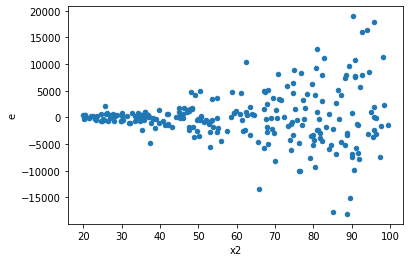

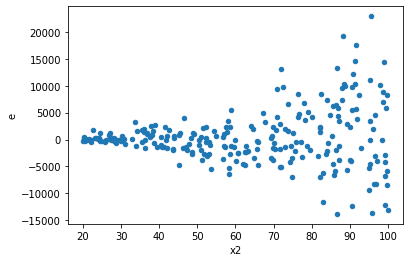

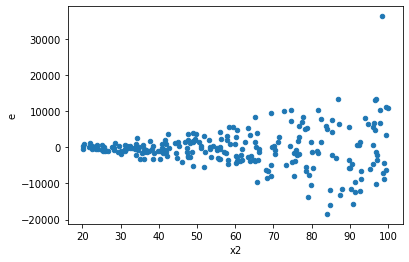

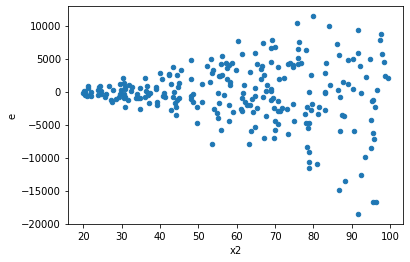

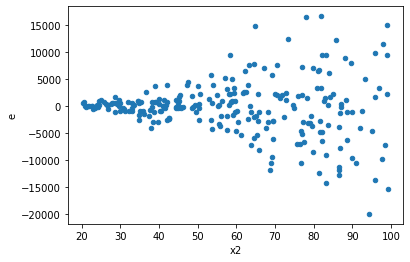

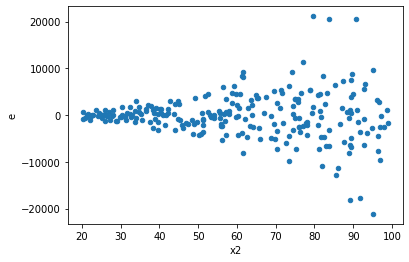

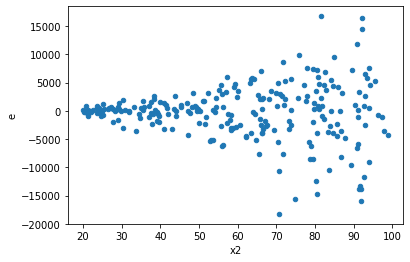

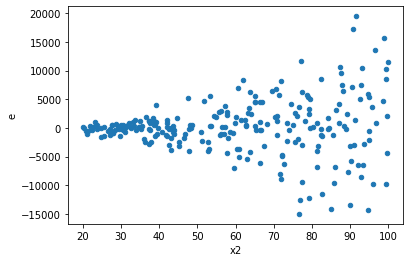

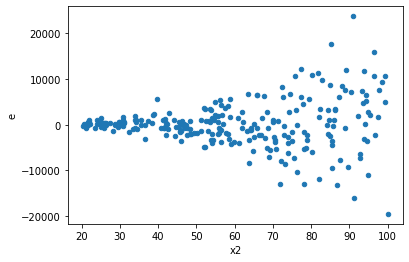

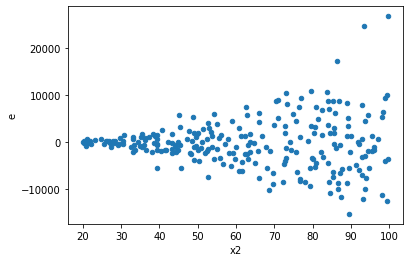

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,4820244356.791381,187668030.19272196,50210878.71657688,1954875.3145075205,25.684952049858076,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,5587249891.364535,216908115.69519076,58200519.70171391,2259459.5384915704,25.758602316272917,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,6598891514.614627,264452315.57263702,68738453.2772357,2754711.6205483023,24.953048720052184,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,3918787572.881022,337912496.37117326,40820703.88417731,3519921.8371997215,11.59704839260075,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,5015500736.802889,192833885.50478795,52244799.34169676,2008686.3073415412,26.00943669041174,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,4679345884.307016,263801072.48298785,48743186.29486475,2747927.838364457,17.738160956903542,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,4907426867.005205,221513513.02208155,51119029.86463755,2307432.4273133497,22.15407448536112,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,4801263091.45523,204982141.2230088,50013157.202658646,2135230.637739675,23.422836071517718,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,5171430133.340624,228190335.07627818,53869063.88896483,2376982.6570445644,22.662792145039564,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,4820244356.791381,187668030.19272196,50210878.71657688,1954875.3145075205,25.684952049858076,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,5587249891.364535,216908115.69519076,58200519.70171391,2259459.5384915704,25.758602316272917,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,6598891514.614627,264452315.57263702,68738453.2772357,2754711.6205483023,24.953048720052184,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,3918787572.881022,337912496.37117326,40820703.88417731,3519921.8371997215,11.59704839260075,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,5015500736.802889,192833885.50478795,52244799.34169676,2008686.3073415412,26.00943669041174,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,4679345884.307016,263801072.48298785,48743186.29486475,2747927.838364457,17.738160956903542,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,4907426867.005205,221513513.02208155,51119029.86463755,2307432.4273133497,22.15407448536112,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,4801263091.45523,204982141.2230088,50013157.202658646,2135230.637739675,23.422836071517718,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,5171430133.340624,228190335.07627818,53869063.88896483,2376982.6570445644,22.662792145039564,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64